<a href="https://colab.research.google.com/github/newfrogg/Automatic-Differentiation/blob/GiaHinh/autodiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Mục lớn                             | Mục nhỏ                                                         |           |
|-------------------------------------|-----------------------------------------------------------------|-----------|
| Introduction                        |                                                                 |  1 người  |
|                                     | Differential Calculus                                           |  Tử Quân  |
|                                     | Rules of Calculus                                               |  Tử Quân  |
|                                     | Multivariate Chain Rule                                         |  Tử Quân  |
|                                     | Geometry of Gradients and Gradient Descent                      |  Tử Quân  |
| What Autodiff Isn’t                 |                                                                 |  3 người  |
|                                     | Autodiff is not finite differences (numerical differentiation)  |  An Đông  |
|                                     | Autodiff is not symbolic differentiation                        |  An Đông  |
|                                     | What autodiff is ?                                              |  An Đông  |
|                                     | Types of Autodiff (explain forward, backward)                   |  An Đông  |
|                                     | Backpropagation Algorithm                                       |  Gia Hinh |
|                                     | give an example and describe the autodiff step-by-step workflow |  Gia Hinh |
|                                     | The Power of Automatic Differentiation, Applications                                     |  Gia Hinh |
|                                     | Summary. Compare betwwen each type advancement of each types    |  Gia Hinh |
| Visualization. Code, Implementation |                                                                 |  1 người  |
|                                     | Code                                                            | Bảo Lương |
| Exercise                            |                                                                 |  2 người  |
|                                     | Q1-4                                                            |   Triết   |
|                                     | Q5-8                                                            | Minh Quân |

# Introduction

## Differential Calculus
## Rules of Calculus
## Geometry of Gradients and Gradient Descent

## Multivariate Chain Rule
## The Backpropagation Algorithm

https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/single-variable-calculus.html
https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/multivariable-calculus.html

# What Autodiff Isn’t

## Autodiff is not finite differences (numerical differentiation)

## Autodiff is not symbolic differentiation

## What autodiff is ? Types of Autodiff (explain forward, backward)
f(x1,x2) = [sin(x1/x2) + x1/x2 - e^x2] * [x1/x2 + e^x2]

## Types of Autodiff (explain forward, backward)







## Backpropagation Algorithm
Backpropagation Algorithm is the central in traning neural networks.
* It is an algorithm for computing gradients
* It is a special case of **reverse-mode automatic differentiation** (AD) applied to a computational graph with <font color='red'>a scalar-output</font>.
* Note: Backpropagation refers to the <font color='red'> whole process of training an artificial neural network </font> using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. **In contrast, reverse-mode auto diff is simply a technique used to compute gradients efficiently and it happens to be used by backpropagation.**

Let take an example. We have a function, where:

\begin{split}\begin{aligned}
f(u, v) & = (u+v)^{2} \\
u(a, b) & = (a+b)^{2}, \qquad v(a, b) = (a-b)^{2}, \\
a(w, x, y, z) & = (w+x+y+z)^{2}, \qquad b(w, x, y, z) = (w+x-y-z)^2.
\end{aligned}\end{split}

For illustration, this diagram describes the nodes represent variables and edges show functional dependence.
<p align="center">
  <img src="https://d2l.ai/_images/chain-net1.svg" width="400" height="300"/>
</p>



If we want to calculate $\frac{\partial f}{\partial w}$, applying the multi-variate chain rule to get that:
\begin{split}\begin{aligned}
\frac{\partial f}{\partial w} & = \frac{\partial f}{\partial u}\frac{\partial u}{\partial w} + \frac{\partial f}{\partial v}\frac{\partial v}{\partial w}, \\
\frac{\partial u}{\partial w} & = \frac{\partial u}{\partial a}\frac{\partial a}{\partial w}+\frac{\partial u}{\partial b}\frac{\partial b}{\partial w}, \\
\frac{\partial v}{\partial w} & = \frac{\partial v}{\partial a}\frac{\partial a}{\partial w}+\frac{\partial v}{\partial b}\frac{\partial b}{\partial w}.
\end{aligned}\end{split}

Next, try using this decomposition to compute $\frac{\partial f}{\partial w}$. Notice that all we need here are the various single step partials:
\begin{split}\begin{aligned}
\frac{\partial f}{\partial u} = 2(u+v), & \quad\frac{\partial f}{\partial v} = 2(u+v), \\
\frac{\partial u}{\partial a} = 2(a+b), & \quad\frac{\partial u}{\partial b} = 2(a+b), \\
\frac{\partial v}{\partial a} = 2(a-b), & \quad\frac{\partial v}{\partial b} = -2(a-b), \\
\frac{\partial a}{\partial w} = 2(w+x+y+z), & \quad\frac{\partial b}{\partial w} = 2(w+x-y-z).
\end{aligned}\end{split}

If we write this out into code this becomes a fairly manageable expression.




In [2]:
# !pip install torch==2.0.0 torchvision==0.15.1
# !pip install d2l==1.0.3
## Import necessary libraries
%matplotlib inline
import numpy as np
import torch
from IPython import display
from mpl_toolkits import mplot3d
# from d2l import torch as d2l
# Compute the value of the function from inputs to outputs
w, x, y, z = -1, 0, -2, 1
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2
print(f'    f at {w}, {x}, {y}, {z} is {f}')

# Compute the single step partials
df_du, df_dv = 2*(u + v), 2*(u + v)
du_da, du_db, dv_da, dv_db = 2*(a + b), 2*(a + b), 2*(a - b), -2*(a - b)
da_dw, db_dw = 2*(w + x + y + z), 2*(w + x - y - z)

# Compute the final result from inputs to outputs
du_dw, dv_dw = du_da*da_dw + du_db*db_dw, dv_da*da_dw + dv_db*db_dw
df_dw = df_du*du_dw + df_dv*dv_dw
print(f'df/dw at {w}, {x}, {y}, {z} is {df_dw}')

    f at -1, 0, -2, 1 is 1024
df/dw at -1, 0, -2, 1 is -4096


However, note that this still does not make it easy to compute something like
$\frac{\partial f}{\partial x}$

The reason for that is the way we chose to apply the chain rule. If we look at what we did above, we always kept $\partial w$ in the denominator when we would. In this way, we chose to apply the chain rule seeing how changed every other variable. If that is what we wanted, this would be a good idea.

However, think back to our motivation from deep learning: we want to see how very parameter changes the loss. In essence, we want to apply the chain rule keeping $\partial f$ in the numerator whenever we can!

To be more explicit, note that we can write

\begin{split}\begin{aligned}
\frac{\partial f}{\partial w} & = \frac{\partial f}{\partial a}\frac{\partial a}{\partial w} + \frac{\partial f}{\partial b}\frac{\partial b}{\partial w}, \\
\frac{\partial f}{\partial a} & = \frac{\partial f}{\partial u}\frac{\partial u}{\partial a}+\frac{\partial f}{\partial v}\frac{\partial v}{\partial a}, \\
\frac{\partial f}{\partial b} & = \frac{\partial f}{\partial u}\frac{\partial u}{\partial b}+\frac{\partial f}{\partial v}\frac{\partial v}{\partial b}.
\end{aligned}\end{split}

Note that this application of the chain rule has us explicitly compute $\frac{\partial f}{\partial u}, \frac{\partial f}{\partial v}, \frac{\partial f}{\partial a}, \frac{\partial f}{\partial b}, \; \textrm{and} \; \frac{\partial f}{\partial w}$

\begin{split}\begin{aligned}
\frac{\partial f}{\partial x} & = \frac{\partial f}{\partial a}\frac{\partial a}{\partial x} + \frac{\partial f}{\partial b}\frac{\partial b}{\partial x}, \\
\frac{\partial f}{\partial y} & = \frac{\partial f}{\partial a}\frac{\partial a}{\partial y}+\frac{\partial f}{\partial b}\frac{\partial b}{\partial y}, \\
\frac{\partial f}{\partial z} & = \frac{\partial f}{\partial a}\frac{\partial a}{\partial z}+\frac{\partial f}{\partial b}\frac{\partial b}{\partial z}.
\end{aligned}\end{split}

and then keeping track of how $f$ changes when we change any node in the entire network. Let’s implement it.



In [3]:
# Compute the value of the function from inputs to outputs
w, x, y, z = -1, 0, -2, 1
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2
print(f'f at {w}, {x}, {y}, {z} is {f}')

# Compute the derivative using the decomposition above
# First compute the single step partials
df_du, df_dv = 2*(u + v), 2*(u + v)
du_da, du_db, dv_da, dv_db = 2*(a + b), 2*(a + b), 2*(a - b), -2*(a - b)
da_dw, db_dw = 2*(w + x + y + z), 2*(w + x - y - z)
da_dx, db_dx = 2*(w + x + y + z), 2*(w + x - y - z)
da_dy, db_dy = 2*(w + x + y + z), -2*(w + x - y - z)
da_dz, db_dz = 2*(w + x + y + z), -2*(w + x - y - z)

# Now compute how f changes when we change any value from output to input
df_da, df_db = df_du*du_da + df_dv*dv_da, df_du*du_db + df_dv*dv_db
df_dw, df_dx = df_da*da_dw + df_db*db_dw, df_da*da_dx + df_db*db_dx
df_dy, df_dz = df_da*da_dy + df_db*db_dy, df_da*da_dz + df_db*db_dz

print(f'df/dw at {w}, {x}, {y}, {z} is {df_dw}')
print(f'df/dx at {w}, {x}, {y}, {z} is {df_dx}')
print(f'df/dy at {w}, {x}, {y}, {z} is {df_dy}')
print(f'df/dz at {w}, {x}, {y}, {z} is {df_dz}')

f at -1, 0, -2, 1 is 1024
df/dw at -1, 0, -2, 1 is -4096
df/dx at -1, 0, -2, 1 is -4096
df/dy at -1, 0, -2, 1 is -4096
df/dz at -1, 0, -2, 1 is -4096


The fact that we compute derivatives from back towards the inputs rather than from the inputs forward to the outputs (as we did in the first code snippet above) is what gives this algorithm its name: backpropagation. Note that there are two steps:
1. Compute the value of the function, and the single step partials from front to back. While not done above, this can be combined into a single **forward pass**.
2. Compute the gradient of $f$ from back to front. We call this the **backwards pass**.

<font color='red'>This is precisely what every deep learning algorithm implements to allow the computation of the gradient of the loss with respect to every weight in the network at one pass</font>



To see how to encapsulated this, let’s take a quick look at this example.

In [5]:
# Initialize as ndarrays, then attach gradients
w = torch.tensor([-1.], requires_grad=True)
x = torch.tensor([0.], requires_grad=True)
y = torch.tensor([-2.], requires_grad=True)
z = torch.tensor([1.], requires_grad=True)
# Do the computation like usual, tracking gradients
a, b = (w + x + y + z)**2, (w + x - y - z)**2
u, v = (a + b)**2, (a - b)**2
f = (u + v)**2

# Execute backward pass
f.backward()

print(f'df/dw at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {w.grad.data.item()}')
print(f'df/dx at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {x.grad.data.item()}')
print(f'df/dy at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {y.grad.data.item()}')
print(f'df/dz at {w.data.item()}, {x.data.item()}, {y.data.item()}, '
      f'{z.data.item()} is {z.grad.data.item()}')

df/dw at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dx at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dy at -1.0, 0.0, -2.0, 1.0 is -4096.0
df/dz at -1.0, 0.0, -2.0, 1.0 is -4096.0


All of what we did above can be done automatically by calling **f.backwards()**.

### Backpropagation of Loss
* The function we want to minimize or maximize is called the objective function or criterion. When we are minimizing it, we may also call it the cost function, loss function or error
function.
* Loss is the starting point of the backpropagation
* Backpropagation is the method to minimize the loss function by adjusting network’s weights and biases. The level of adjustment is determined by the gradients of the loss function






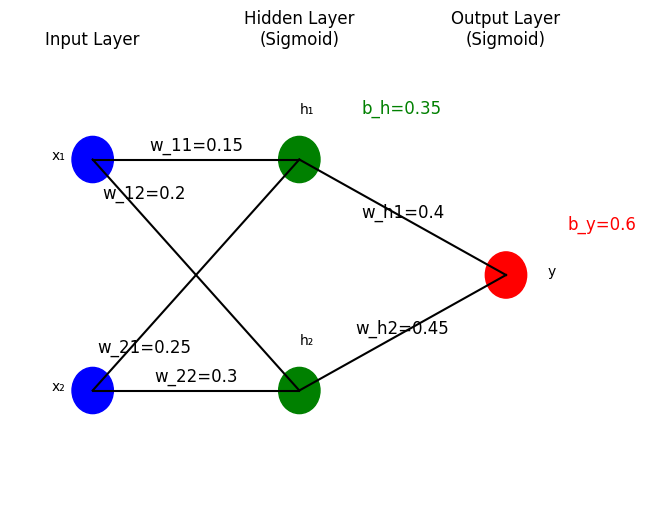

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Define the network structure
input_neurons = 2
hidden_neurons = 2
output_neurons = 1

# Weights and biases from the example
weights_input_hidden = np.array([[0.15, 0.2], [0.25, 0.3]])  # w11, w12, w21, w22
weights_hidden_output = np.array([0.4, 0.45])  # w_h1, w_h2
bias_hidden = 0.35  # b_h
bias_output = 0.6   # b_y

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Positions for neurons in straight rows
input_pos = np.array([[0, 0.75], [0, 0.25]])  # x1, x2
hidden_pos = np.array([[0.5, 0.75], [0.5, 0.25]])  # h1, h2
output_pos = np.array([[1, 0.5]])  # y

# Draw neurons
for pos in input_pos:
    ax.add_patch(plt.Circle(pos, 0.05, color='blue', fill=True))
for pos in hidden_pos:
    ax.add_patch(plt.Circle(pos, 0.05, color='green', fill=True))
for pos in output_pos:
    ax.add_patch(plt.Circle(pos, 0.05, color='red', fill=True))

# Draw connections and label weights with offset to avoid overlap
for i in range(input_neurons):
    for j in range(hidden_neurons):
        ax.plot([input_pos[i][0], hidden_pos[j][0]], [input_pos[i][1], hidden_pos[j][1]], 'k-')
        if i != j:
            mid_x = (input_pos[i][0] + hidden_pos[j][0]) / 4
            mid_y = (input_pos[i][1] + hidden_pos[j][1]) / (3 / (j + 1))
            ax.text(mid_x , mid_y , f'w_{i+1}{j+1}={weights_input_hidden[i][j]}', fontsize=12, ha='center')
            continue
        # Calculate midpoint for label placement
        mid_x = (input_pos[i][0] + hidden_pos[j][0]) / 2
        mid_y = (input_pos[i][1] + hidden_pos[j][1]) / 2 + 0.02
        ax.text(mid_x , mid_y , f'w_{i+1}{j+1}={weights_input_hidden[i][j]}', fontsize=12, ha='center')

for i in range(hidden_neurons):
    ax.plot([hidden_pos[i][0], output_pos[0][0]], [hidden_pos[i][1], output_pos[0][1]], 'k-')
    # Label weights
    mid_x = (hidden_pos[i][0] + output_pos[0][0]) / 2
    mid_y = (hidden_pos[i][1] + output_pos[0][1]) / 2
    ax.text(mid_x, mid_y, f'w_h{i+1}={weights_hidden_output[i]}', fontsize=12, ha='center')

# Draw biases
ax.text(hidden_pos[0][0] + 0.15, hidden_pos[0][1] + 0.1, f'b_h={bias_hidden}', fontsize=12, color='green')
ax.text(output_pos[0][0] + 0.15, output_pos[0][1] + 0.1, f'b_y={bias_output}', fontsize=12, color='red')

# Label neurons
ax.text(input_pos[0][0] - 0.1, input_pos[0][1], 'x₁', fontsize=10)
ax.text(input_pos[1][0] - 0.1, input_pos[1][1], 'x₂', fontsize=10)
ax.text(hidden_pos[0][0], hidden_pos[0][1] + 0.1, 'h₁', fontsize=10)
ax.text(hidden_pos[1][0], hidden_pos[1][1] + 0.1, 'h₂', fontsize=10)
ax.text(output_pos[0][0] + 0.1, output_pos[0][1], 'y', fontsize=10)

# Label layers
ax.text(0, 1, 'Input Layer', fontsize=12, ha='center')
ax.text(0.5, 1, 'Hidden Layer\n(Sigmoid)', fontsize=12, ha='center')
ax.text(1, 1, 'Output Layer\n(Sigmoid)', fontsize=12, ha='center')

# Set limits and remove axes
ax.set_xlim(-0.2, 1.3)
ax.set_ylim(0, 1)
ax.axis('off')

# Display the plot in Colab
plt.show()

For example, we simple feedforward neural network with one hidden layer. The network has:

* Input layer: 2 neurons ($x_1$, $x_2$)
* Hidden layer: 2 neurons ($h_1$, $h_2$) with sigmoid activation
* Output layer: 1 neuron ($y$) with sigmoid activation
* Loss function: Mean Squared Error (MSE)

We’ll compute gradients and update weights for one training example with
Input: $x = [x_1, x_2] = [0.5, 0.1]$. Target output: $t = 0.8$

Weights and biases (randomly initialized):

* Input to hidden: $w_{11} = 0.15$, $w_{12} = 0.2$, $w_{21} = 0.25$, $w_{22} = 0.3$

* Hidden to output: $w_{h1} = 0.4$, $w_{h2} = 0.45$

* Biases: $b_h = 0.35$ (hidden), $b_y = 0.6$ (output)

* Learning rate: $\eta = 0.5$

* Activation function: Sigmoid, $\sigma(z) = \frac{1}{1 + e^{-z}}$,

* Derivative: $\sigma'(z) = \sigma(z)(1 - \sigma(z))$

The network structure is:

* Input: $x_1$, $x_2$

* Hidden: $h_1 = \sigma(w_{11}x_1 + w_{21}x_2 + b_h)$, $h_2 = \sigma(w_{12}x_1 + w_{22}x_2 + b_h)$

* Output: $y = \sigma(w_{h1}h_1 + w_{h2}h_2 + b_y)$

* Loss: $E = \frac{1}{2}(t - y)^2$


<font color='red'>Step 1: Forward Pass. Compute the activations of all neurons. </font>

Hidden Layer:

Net input to $h_1$:$$z_{h1} = w_{11}x_1 + w_{21}x_2 + b_h = (0.15)(0.5) + (0.25)(0.1) + 0.35 = 0.075 + 0.025 + 0.35 = 0.45$$$$h_1 = \sigma(z_{h1}) = \frac{1}{1 + e^{-0.45}} \approx 0.6106$$

Net input to $h_2$:$$z_{h2} = w_{12}x_1 + w_{22}x_2 + b_h = (0.2)(0.5) + (0.3)(0.1) + 0.35 = 0.1 + 0.03 + 0.35 = 0.48$$$$h_2 = \sigma(z_{h2}) = \frac{1}{1 + e^{-0.48}} \approx 0.6177$$


Output Layer:

Net input to $y$:$$z_y = w_{h1}h_1 + w_{h2}h_2 + b_y = (0.4)(0.6106) + (0.45)(0.6177) + 0.6 \approx 0.2442 + 0.2780 + 0.6 = 1.1222$$$$y = \sigma(z_y) = \frac{1}{1 + e^{-1.1222}} \approx 0.7546$$

Loss:$$E = \frac{1}{2}(t - y)^2 = \frac{1}{2}(0.8 - 0.7546)^2 = \frac{1}{2}(0.0454)^2 \approx 0.00103$$

<font color='red'> Step 2: Backward Pass (Compute Gradients) </font>

We compute the partial derivatives of the loss $E$ with respect to each weight and bias, starting from the output layer and moving backward.
Output Layer Gradients:

Error term for output neuron:$$\delta_y = \frac{\partial E}{\partial y} \cdot \sigma'(z_y)$$

Loss derivative: $\frac{\partial E}{\partial y} = -(t - y) = -(0.8 - 0.7546) = -0.0454$
Sigmoid derivative: $\sigma'(z_y) = y(1 - y) = 0.7546(1 - 0.7546) \approx 0.1851$
$\delta_y = -0.0454 \cdot 0.1851 \approx -0.0084$


Gradients for weights to output:$$\frac{\partial E}{\partial w_{h1}} = \delta_y \cdot h_1 = -0.0084 \cdot 0.6106 \approx -0.00513$$$$\frac{\partial E}{\partial w_{h2}} = \delta_y \cdot h_2 = -0.0084 \cdot 0.6177 \approx -0.00519$$

Gradient for output bias:$$\frac{\partial E}{\partial b_y} = \delta_y = -0.0084$$


Hidden Layer Gradients:

Error terms for hidden neurons:$$\delta_{h1} = \left( w_{h1} \cdot \delta_y \right) \cdot \sigma'(z_{h1})$$

$w_{h1} \cdot \delta_y = 0.4 \cdot (-0.0084) \approx -0.00336$
Sigmoid derivative: $\sigma'(z_{h1}) = h_1(1 - h_1) = 0.6106(1 - 0.6106) \approx 0.2379$
$\delta_{h1} = -0.00336 \cdot 0.2379 \approx -0.0008$

$$\delta_{h2} = \left( w_{h2} \cdot \delta_y \right) \cdot \sigma'(z_{h2})$$

$w_{h2} \cdot \delta_y = 0.45 \cdot (-0.0084) \approx -0.00378$
Sigmoid derivative: $\sigma'(z_{h2}) = h_2(1 - h_2) = 0.6177(1 - 0.6177) \approx 0.2362$
$\delta_{h2} = -0.00378 \cdot 0.2362 \approx -0.00089$


Gradients for weights to hidden layer:$$\frac{\partial E}{\partial w_{11}} = \delta_{h1} \cdot x_1 = -0.0008 \cdot 0.5 \approx -0.0004$$$$\frac{\partial E}{\partial w_{21}} = \delta_{h1} \cdot x_2 = -0.0008 \cdot 0.1 \approx -0.00008$$$$\frac{\partial E}{\partial w_{12}} = \delta_{h2} \cdot x_1 = -0.00089 \cdot 0.5 \approx -0.000445$$$$\frac{\partial E}{\partial w_{22}} = \delta_{h2} \cdot x_2 = -0.00089 \cdot 0.1 \approx -0.000089$$

Gradient for hidden bias:$$\frac{\partial E}{\partial b_h} = \delta_{h1} + \delta_{h2} = -0.0008 + (-0.00089) \approx -0.00169$$

<font color='red'> Step 3: Update Weights and Biases </font>

Using gradient descent: $w = w - \eta \cdot \frac{\partial E}{\partial w}$.
Output Layer:

$w_{h1} = 0.4 - 0.5 \cdot (-0.00513) = 0.4 + 0.002565 \approx 0.4026$
$w_{h2} = 0.45 - 0.5 \cdot (-0.00519) = 0.45 + 0.002595 \approx 0.4526$
$b_y = 0.6 - 0.5 \cdot (-0.0084) = 0.6 + 0.0042 \approx 0.6042$

Hidden Layer:

$w_{11} = 0.15 - 0.5 \cdot (-0.0004) = 0.15 + 0.0002 \approx 0.1502$
$w_{21} = 0.25 - 0.5 \cdot (-0.00008) = 0.25 + 0.00004 \approx 0.25004$
$w_{12} = 0.2 - 0.5 \cdot (-0.000445) = 0.2 + 0.0002225 \approx 0.2002$
$w_{22} = 0.3 - 0.5 \cdot (-0.000089) = 0.3 + 0.0000445 \approx 0.30004$
$b_h = 0.35 - 0.5 \cdot (-0.00169) = 0.35 + 0.000845 \approx 0.3508$

### Backpropagation Application & Problems

#### Applications of Backpropagation

### In Machine Learning (ML)
* Backpropagation is the backbone of training artificial neural networks (ANNs) and is widely used across ML domains:

    - **Image Recognition**: Optimizes weights in convolutional neural networks (CNNs) for tasks like object detection (e.g., identifying objects in images).
    - **Natural Language Processing (NLP)**: Adjusts weights in recurrent neural networks (RNNs) and transformers for tasks like machine translation and text generation.
    - **Speech Recognition**: Fine-tunes deep neural networks to convert audio to text by minimizing prediction errors.
* **Control Systems**: Optimizes parameters in control algorithms for robotics or autonomous systems, adjusting to minimize error in system dynamics.
  
  $E = \frac{1}{2} (y_{\text{desired}} - y_{\text{actual}})^2$
  
- **Physics Simulations**: Used to fit models to experimental data, such as optimizing parameters in computational fluid dynamics.
- **Economics**: Adjusts weights in econometric models to predict economic trends or optimize resource allocation.
- **Signal Processing**: Fine-tunes filters in adaptive signal processing to minimize noise in communication systems.

#### Problems and Challenges with Backpropagation
- **Vanishing/Exploding Gradients**: Throughout Backpropagation workflow, gradients are multiplied across layers, this can lead to two extreme cases:

    Gradients can shrink $( \frac{\partial E}{\partial w} \to 0 )$ or grow  $( \frac{\partial E}{\partial w} \to \infty )$

<font color='red'>This is also called Backpropagation through Time Problem (BPTT)</font>.

- **Overfitting**: Models may memorize training data, requiring regularization like dropout.

- **Computational Complexity**: Training large networks demands significant computational resources (e.g., GPUs).
- **Local Minima**: The algorithm may converge to suboptimal solutions, though this is less critical in high-dimensional spaces.

  $E(w) = \frac{1}{2} \sum (t - y)^2$

- **Initialization Sensitivity**: Poor weight initialization can lead to slow convergence, addressed by methods like Xavier initialization.

Backpropagation’s versatility makes it a powerful tool across domains, though its challenges require tailored solutions depending on the application.

## Comparision & Summary


### Comparison between other Differentiation methods
1. Compare to Numerical Differentiation:

| **Aspect**               | **Numerical Differentiation**                              | **Automatic Differentiation**                            |
|---------------------------|-----------------------------------------------------------|--------------------------------------------------------|
| **Accuracy**             | Approximates derivatives (e.g., $ f'(x) \approx \frac{f(x + h) - f(x)}{h} $). Prone to round-off and truncation errors, accuracy decreases with complex functions or noisy data. | Exact derivatives up to machine precision via computational graph. Avoids approximation errors. |
| **Computational Efficiency** | Requires $ O(n) $ function evaluations for $ n $ parameters (e.g., central differences). Inefficient for **high-dimensional problems**. | Operates at the cost of function evaluation, $ O(n) $ for forward mode or $ O(n) $ per output in reverse mode. **Highly efficient for complex models**. |
| **Implementation Complexity** | Simple to implement (e.g., finite difference formula). Requires tuning step size $ h $ to balance accuracy and error. | Requires computational graph (handled by frameworks like TensorFlow or PyTorch). Complex manually but integrated into ML libraries. |
| **Applicability**        | Suitable for simple functions or black-box models where derivatives are unavailable. Struggles with high-dimensional or noisy data. | Excels in ML, optimizing deep networks with thousands of parameters. Applicable to any computable function, including those with control flow. |
| **Memory Usage**         | Minimal memory, stores only function evaluations.         | Moderate to high memory usage (forward mode stores intermediates, reverse mode stores graph). Scales with outputs in reverse mode. |
| **Mathematical Insight** | $ f'(x) \approx \frac{f(x + h) - f(x - h)}{2h} $ (error $ O(h^2) $). | Computes $ \frac{\partial E}{\partial w} $ by chaining partial derivatives (e.g., $ \frac{\partial E}{\partial w} = \frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial w} $), exact and efficient. |

2. Compare to Symbolic Differentiation:

| **Aspect**               | **Symbolic Differentiation**                              | **Automatic Differentiation**                            |
|---------------------------|-----------------------------------------------------------|--------------------------------------------------------|
| **Accuracy**             | Provides exact derivatives (e.g., $ \frac{d}{dx}(x^2) = 2x $). No approximation errors, but suffers from expression swell with large expressions. | Delivers exact derivatives up to machine precision via computational graph. |
| **Computational Efficiency** | Computationally expensive due to symbolic manipulation and simplification. Exponential growth in complexity with nested functions. | Operates at the cost of function evaluation, $ O(n) $ for forward mode or $ O(n) $ per output in reverse mode. Highly efficient for complex models. |
| **Implementation Complexity** | Requires a symbolic math engine (e.g., SymPy), complex for large systems. Impractical for dynamic computations. | Requires computational graph (handled by frameworks like TensorFlow or PyTorch). Complex manually but integrated into ML libraries. |
| **Applicability**        | Ideal for analytical derivations or small, static expressions. Impractical for large-scale, data-driven models. | Excels in ML, optimizing deep networks with thousands of parameters. Applicable to any computable function, including those with control flow. |
| **Memory Usage**         | High memory usage due to storing symbolic expressions.   | Moderate to high memory usage (forward mode stores intermediates, reverse mode stores graph). Scales with outputs in reverse mode. |
| **Mathematical Insight** | $ \frac{d}{dx}(e^{x^2}) = 2x e^{x^2} $, exact but grows with complexity. | Computes $ \frac{\partial E}{\partial w} $ by chaining partial derivatives (e.g., $ \frac{\partial E}{\partial w} = \frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial w} $), exact and efficient. |

3. Insights:
- **Numerical Differentiation** is simple but inaccurate and inefficient for large systems.
- **Symbolic Differentiation** is precise but impractical for dynamic, large-scale problems.
- **Automatic Differentiation** strikes a balance, offering exactness and efficiency, making it the preferred choice for modern machine.

### Comparison between Forward & Backward mode
| Feature                     | Forward Mode AD                          | Backward Mode AD                         |
|-----------------------------|------------------------------------------|------------------------------------------|
| **Definition**              | Computes derivatives alongside function evaluation, propagating derivatives forward. | Computes derivatives by backpropagating gradients from output to input. |
| **Computation Direction**   | Forward: from inputs to outputs.         | Backward: from outputs to inputs.        |
| **Derivative Propagation**  | Accumulates derivatives (tangents) during forward pass. | Accumulates gradients during backward pass. |
| **Efficiency**              | Efficient for functions with few inputs and many outputs (e.g., $ f: \mathbb{R}^n \to \mathbb{R}^m $, $ n \ll m $). | Efficient for functions with many inputs and few outputs (e.g., $ f: \mathbb{R}^n \to \mathbb{R}^m $, $ n \gg m $). |
| **Memory Usage**            | Lower memory for small input dimensions; stores intermediate tangents. | Higher memory; stores intermediate activations for backward pass. |
| **Use Case**                | Real-time systems, sensitivity analysis for small input spaces. | Neural network training, optimization problems with scalar loss. |
| **Implementation Complexity** | Simpler to implement for small systems.  | More complex, requires reverse computation graph. |
| **Example Application**     | Computing Jacobians for small systems.   | Gradient computation in deep learning.   |
| **Scalability**             | Scales poorly with large input dimensions. | Scales well with large input dimensions. |

### Recommended usage for each mode
**Forward Mode:**
* Good when you have a small number of inputs (e.g., 2–3 parameters).
* Ideal for Jacobian-vector products: e.g., computing directional derivatives.

**Backward Mode:**
* When you have many inputs and one output (e.g., loss function in neural nets).
* Ideal for training machine learning models (via backpropagation).

## References
[Automatic Differentiation in Machine Learning: a Survey](https://arxiv.org/pdf/1502.05767)

[Automatic Differentiation D2l](https://d2l.ai/chapter_preliminaries/autograd.html)

[Youtube](https://www.youtube.com/watch?v=wG_nF1awSSY)



# Visualization

Code, implement AutoDiff, explain with an example. show backward and forward
Ex: f(x1, x2) = ln(x1) + x1x2 - sin(x2)

https://d2l.ai/chapter_preliminaries/autograd.html

https://homepages.inf.ed.ac.uk/htang2/mlg2022/tutorial-3.pdf


# Exercises (1-4)

1. Why is the second derivative much more expensive to compute than the first derivative?
1. After running the function for backpropagation, immediately run it again and see what happens. Investigate.
1. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?
1. Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.



# Exercises (5-8)
1. Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.
1. Use the chain rule to compute the derivative $\frac{df}{dx}$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.
1. Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as *forward differentiation*, whereas the path from $f$ to $x$ is known as backward differentiation.
1. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.

***Reference: origin notebook of d2l as below***

# Automatic Differentiation
:label:`sec_autograd`

Recall from :numref:`sec_calculus`
that calculating derivatives is the crucial step
in all the optimization algorithms
that we will use to train deep networks.
While the calculations are straightforward,
working them out by hand can be tedious and error-prone,
and these issues only grow
as our models become more complex.

Fortunately all modern deep learning frameworks
take this work off our plates
by offering *automatic differentiation*
(often shortened to *autograd*).
As we pass data through each successive function,
the framework builds a *computational graph*
that tracks how each value depends on others.
To calculate derivatives,
automatic differentiation
works backwards through this graph
applying the chain rule.
The computational algorithm for applying the chain rule
in this fashion is called *backpropagation*.

While autograd libraries have become
a hot concern over the past decade,
they have a long history.
In fact the earliest references to autograd
date back over half of a century :cite:`Wengert.1964`.
The core ideas behind modern backpropagation
date to a PhD thesis from 1980 :cite:`Speelpenning.1980`
and were further developed in the late 1980s :cite:`Griewank.1989`.
While backpropagation has become the default method
for computing gradients, it is not the only option.
For instance, the Julia programming language employs
forward propagation :cite:`Revels.Lubin.Papamarkou.2016`.
Before exploring methods,
let's first master the autograd package.


In [ ]:
import torch

## A Simple Function

Let's assume that we are interested
in (**differentiating the function
$y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to the column vector $\mathbf{x}$.**)
To start, we assign `x` an initial value.


In [ ]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

[**Before we calculate the gradient
of $y$ with respect to $\mathbf{x}$,
we need a place to store it.**]
In general, we avoid allocating new memory
every time we take a derivative
because deep learning requires
successively computing derivatives
with respect to the same parameters
a great many times,
and we might risk running out of memory.
Note that the gradient of a scalar-valued function
with respect to a vector $\mathbf{x}$
is vector-valued with
the same shape as $\mathbf{x}$.


In [ ]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

(**We now calculate our function of `x` and assign the result to `y`.**)


In [ ]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

[**We can now take the gradient of `y`
with respect to `x`**] by calling
its `backward` method.
Next, we can access the gradient
via `x`'s `grad` attribute.


In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

(**We already know that the gradient of the function $y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to $\mathbf{x}$ should be $4\mathbf{x}$.**)
We can now verify that the automatic gradient computation
and the expected result are identical.


In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

[**Now let's calculate
another function of `x`
and take its gradient.**]
Note that PyTorch does not automatically
reset the gradient buffer
when we record a new gradient.
Instead, the new gradient
is added to the already-stored gradient.
This behavior comes in handy
when we want to optimize the sum
of multiple objective functions.
To reset the gradient buffer,
we can call `x.grad.zero_()` as follows:


In [ ]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## Backward for Non-Scalar Variables

When `y` is a vector,
the most natural representation
of the derivative of  `y`
with respect to a vector `x`
is a matrix called the *Jacobian*
that contains the partial derivatives
of each component of `y`
with respect to each component of `x`.
Likewise, for higher-order `y` and `x`,
the result of differentiation could be an even higher-order tensor.

While Jacobians do show up in some
advanced machine learning techniques,
more commonly we want to sum up
the gradients of each component of `y`
with respect to the full vector `x`,
yielding a vector of the same shape as `x`.
For example, we often have a vector
representing the value of our loss function
calculated separately for each example among
a *batch* of training examples.
Here, we just want to (**sum up the gradients
computed individually for each example**).


Because deep learning frameworks vary
in how they interpret gradients of
non-scalar tensors,
PyTorch takes some steps to avoid confusion.
Invoking `backward` on a non-scalar elicits an error
unless we tell PyTorch how to reduce the object to a scalar.
More formally, we need to provide some vector $\mathbf{v}$
such that `backward` will compute
$\mathbf{v}^\top \partial_{\mathbf{x}} \mathbf{y}$
rather than $\partial_{\mathbf{x}} \mathbf{y}$.
This next part may be confusing,
but for reasons that will become clear later,
this argument (representing $\mathbf{v}$) is named `gradient`.
For a more detailed description, see Yang Zhang's
[Medium post](https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29).


In [ ]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## Detaching Computation

Sometimes, we wish to [**move some calculations
outside of the recorded computational graph.**]
For example, say that we use the input
to create some auxiliary intermediate terms
for which we do not want to compute a gradient.
In this case, we need to *detach*
the respective computational graph
from the final result.
The following toy example makes this clearer:
suppose we have `z = x * y` and `y = x * x`
but we want to focus on the *direct* influence of `x` on `z`
rather than the influence conveyed via `y`.
In this case, we can create a new variable `u`
that takes the same value as `y`
but whose *provenance* (how it was created)
has been wiped out.
Thus `u` has no ancestors in the graph
and gradients do not flow through `u` to `x`.
For example, taking the gradient of `z = x * u`
will yield the result `u`,
(not `3 * x * x` as you might have
expected since `z = x * x * x`).


In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

Note that while this procedure
detaches `y`'s ancestors
from the graph leading to `z`,
the computational graph leading to `y`
persists and thus we can calculate
the gradient of `y` with respect to `x`.


In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## Gradients and Python Control Flow

So far we reviewed cases where the path from input to output
was well defined via a function such as `z = x * x * x`.
Programming offers us a lot more freedom in how we compute results.
For instance, we can make them depend on auxiliary variables
or condition choices on intermediate results.
One benefit of using automatic differentiation
is that [**even if**] building the computational graph of
(**a function required passing through a maze of Python control flow**)
(e.g., conditionals, loops, and arbitrary function calls),
(**we can still calculate the gradient of the resulting variable.**)
To illustrate this, consider the following code snippet where
the number of iterations of the `while` loop
and the evaluation of the `if` statement
both depend on the value of the input `a`.


In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

Below, we call this function, passing in a random value, as input.
Since the input is a random variable,
we do not know what form
the computational graph will take.
However, whenever we execute `f(a)`
on a specific input, we realize
a specific computational graph
and can subsequently run `backward`.


In [ ]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

Even though our function `f` is, for demonstration purposes, a bit contrived,
its dependence on the input is quite simple:
it is a *linear* function of `a`
with piecewise defined scale.
As such, `f(a) / a` is a vector of constant entries
and, moreover, `f(a) / a` needs to match
the gradient of `f(a)` with respect to `a`.


In [ ]:
a.grad == d / a

tensor(True)

Dynamic control flow is very common in deep learning.
For instance, when processing text, the computational graph
depends on the length of the input.
In these cases, automatic differentiation
becomes vital for statistical modeling
since it is impossible to compute the gradient *a priori*.

## Discussion

You have now gotten a taste of the power of automatic differentiation.
The development of libraries for calculating derivatives
both automatically and efficiently
has been a massive productivity booster
for deep learning practitioners,
liberating them so they can focus on less menial.
Moreover, autograd lets us design massive models
for which pen and paper gradient computations
would be prohibitively time consuming.
Interestingly, while we use autograd to *optimize* models
(in a statistical sense)
the *optimization* of autograd libraries themselves
(in a computational sense)
is a rich subject
of vital interest to framework designers.
Here, tools from compilers and graph manipulation
are leveraged to compute results
in the most expedient and memory-efficient manner.

For now, try to remember these basics: (i) attach gradients to those variables with respect to which we desire derivatives; (ii) record the computation of the target value; (iii) execute the backpropagation function; and  (iv) access the resulting gradient.


## Exercises

1. Why is the second derivative much more expensive to compute than the first derivative?
1. After running the function for backpropagation, immediately run it again and see what happens. Investigate.
1. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?
1. Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.
1. Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.
1. Use the chain rule to compute the derivative $\frac{df}{dx}$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.
1. Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as *forward differentiation*, whereas the path from $f$ to $x$ is known as backward differentiation.
1. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.


[Discussions](https://discuss.d2l.ai/t/35)
